---
title: Lagrange Polynomials

date: 2019-09-01

# Put any other Academic metadata here...
---

This notebook uses the scipy [`lagrange`](https://docs.scipy.org/doc/scipy-1.8.0/html-scipyorg/reference/generated/scipy.interpolate.lagrange.html) function to compute the Lagrange polynomial.

In [1]:
    import numpy as np
    from numpy.polynomial.polynomial import Polynomial
    from scipy.interpolate import lagrange
    import matplotlib.pyplot as plt
    from IPython.display import Markdown as md
    plt.style.use('seaborn-poster')

For some points $x$, define some data $y$ and create the Lagrange polynomial $f$, which has coefficients $p$ 

In [2]:
    x = [0.0, 1.0, 2.0]
    y = [1.0, 3.0, 2.0]
    f = lagrange(x, y)
    p = Polynomial(f.coef[::-1]).coef
    z = ['' if i==0 else ('x' if (i==1) else 'x^{}'.format(i)) for i in np.arange(np.size(x))]
    string= [str(p[i]) + str(z[i]) for i in np.arange(np.size(x))]
    print(string)
    md("Coefficients of the interpolating polynomial: {}".format(p))

['1.0', '3.5x', '-1.5x^2']


Coefficients of the interpolating polynomial: [ 1.   3.5 -1.5]

In [3]:
def lagrange_basis(x_int, y_int, x_new):
    """
    This function takes pairs of points (x_int, y_int) and, from a set of points x_new
    computes the Lagrange polynomial to return the interpolated values y_new 
    """
    l = np.zeros((np.size(x_int), np.size(x_new)), dtype=np.float)
    i = np.int(0)
    for xi, yi in zip(x_int, y_int):
        l[i,:] = np.prod( [(x_new - xj) / (xi - xj) for xj in x_int if xi != xj], axis=0)
        i=i+1
    return l

Plot the data and the individual components of the polynomial

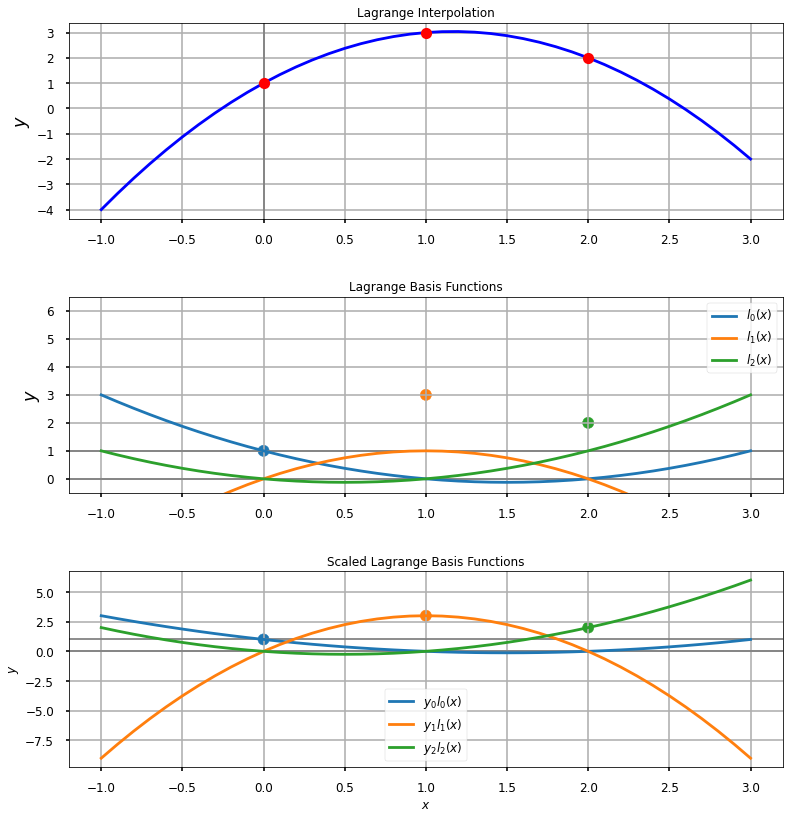

In [4]:
    x_new = np.arange(-1.0, 3.1, 0.1)

    test = lagrange_basis(x, y, x_new)
    fig = plt.figure()
    fig.subplots_adjust(top=1.3, hspace=0.4)
    ax=fig.add_subplot(3,1,1)
    ax.axvline(x=0.0, color="grey", linestyle="-", linewidth=1.75)
    ax.plot(x_new, f(x_new), 'b', x, y, 'ro')
    ax.set_title(r'Lagrange Interpolation', fontsize=12)
    ax.grid()
    ax.set_ylabel(r'$y$')
    ax.tick_params(axis = 'both', which = 'major', labelsize = 12)
    ax1=fig.add_subplot(3,1,2)
    ax1.axhline(y=0.0, color="grey", linestyle="-", linewidth=1.75)
    ax1.axhline(y=1.0, color="grey", linestyle="-", linewidth=1.75)
    ax1.scatter(np.array(x), np.array(y), c=['tab:blue', 'tab:orange', 'tab:green'])
    ax1.plot(x_new, test[0,:], color='tab:blue', label='$l_0(x)$' )
    ax1.plot(x_new, test[1,:], color='tab:orange', label='$l_1(x)$' )
    ax1.plot(x_new, test[2,:], color='tab:green', label='$l_2(x)$' )
    ax1.set_ylim([-0.5, 6.5])
    ax1.grid()
    ax1.set_ylabel(r'$y$')
    ax1.set_title(r'Lagrange Basis Functions', fontsize=12)
    ax1.legend(prop={'size': 12})
    ax1.tick_params(axis = 'both', which = 'major', labelsize = 12)
    
    ax2=fig.add_subplot(3,1,3)
    ax2.grid()
    ax2.axhline(y=0.0, color="grey", linestyle="-", linewidth=1.75)
    ax2.axhline(y=1.0, color="grey", linestyle="-", linewidth=1.75)
    ax2.scatter(np.array(x), np.array(y), c=['tab:blue', 'tab:orange', 'tab:green'])
    ax2.plot(x_new, y[0]*test[0,:], color='tab:blue', label='$y_0 l_0(x)$')
    ax2.plot(x_new, y[1]*test[1,:], color='tab:orange', label='$y_1 l_1(x)$' )
    ax2.plot(x_new, y[2]*test[2,:], color='tab:green', label='$y_2 l_2(x)$' )
    ax2.set_xlabel(r'$x$', fontsize=12)
    ax2.set_ylabel(r'$y$', fontsize=12)
    ax2.set_title(r'Scaled Lagrange Basis Functions', fontsize=12)
    ax2.legend(prop={'size': 12})
    ax2.tick_params(axis = 'both', which = 'major', labelsize = 12)
    
    plt.show()

Now use a different set of points, defined by a function $x \log(x)$. 

In [5]:
g = lambda x: x * np.log(x)

We can compute the polynomials of different orders and the errors.

In [6]:
m = np.array([3,8])

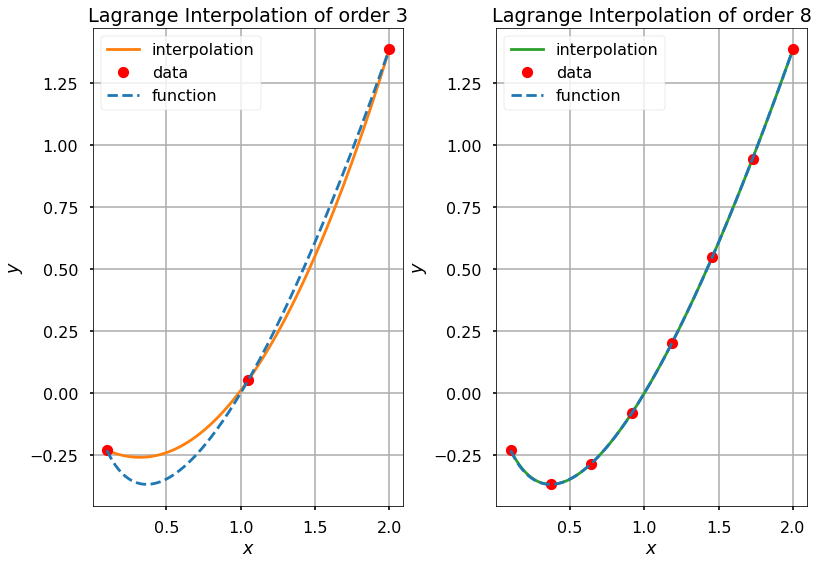

In [7]:
x0 = 0.1
x1 = 2.0
dx = 0.01
x_new = np.arange(x0, x1, dx)
err = np.zeros( (m.size, x_new.size) )
y_new = np.zeros( (m.size, x_new.size) )
fig1 = plt.figure()
fig1.subplots_adjust(wspace=0.3)
for i in np.arange(m.size):
    z = np.linspace(x0, x1, m[i])
    y = g(z)
    f = lagrange(z, y)
    p = Polynomial(f.coef[::-1]).coef
    err[i,:] = g(x_new) - f(x_new)
    md("Coefficients of the interpolating polynomial: {}".format(p))
    ax=fig1.add_subplot(1,m.size,i+1)
    clrs = 'tab:orange' if (i==0) else 'tab:green' 
    ax.plot(x_new, f(x_new), '-', c=clrs, label="interpolation")
    ax.plot(z, y, 'ro', label="data")
    ax.plot(x_new, np.log(x_new) * x_new, linestyle='--', label="function")
    ax.set_title(r'Lagrange Interpolation of order {}'.format(m[i]))
    ax.legend()
    ax.grid()
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')
plt.show()

Plot the errors

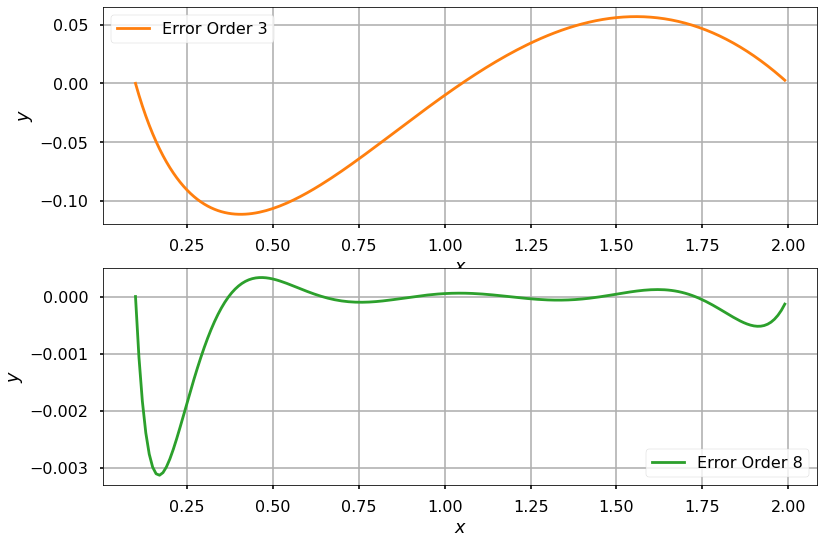

In [8]:
fig2=plt.figure()
for i in np.arange(m.size):
    ax=fig2.add_subplot(m.size,1,i+1)
    clrs = 'tab:orange' if (i==0) else 'tab:green' 
    ax.plot(x_new, err[i], c=clrs, label="Error Order {}".format(m[i]))
    ax.legend()
    ax.grid()
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')
plt.show()

Compute the bounds on the errors.

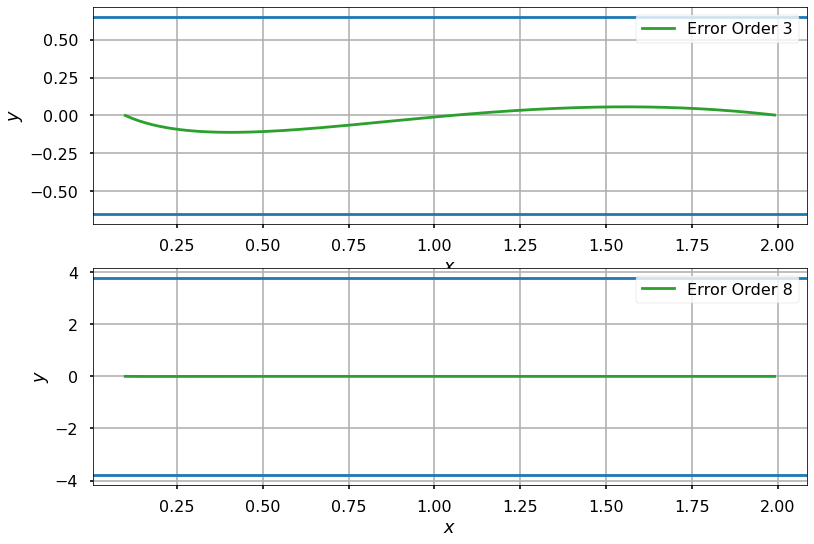

In [9]:
fig3=plt.figure()
for i in np.arange(m.size):
    z = np.linspace(x0, x1, m[i])
    bounds1 = np.prod( [(x_new - z[i])  for i in np.arange(0,m[i])], axis=0)
    bounds2 = (m[i]-2) * (-1)**(m[i]-2) / ( np.math.factorial(m[i]) * x_new**(m[i]-1) )
    ax=fig3.add_subplot(m.size,1,i+1)
    b=np.max(np.abs(bounds1 * bounds2))
    ax.plot(x_new, err[i], c=clrs, label="Error Order {}".format(m[i]))
    ax.axhline(y=b)
    ax.axhline(y=-b)
    ax.legend()
    ax.grid()
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')
plt.show()